In [72]:
from importlib import reload
import data_loader as dl
import naive_bayes as nb
import evaluator as eval
import logistic_regression as lr
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

You can reload the data_loader.py without restarting the kernel using `reload(data_loader)`

In [73]:
reload(dl)
reload(nb)
reload(eval)
reload(lr)

<module 'logistic_regression' from 'D:\\College\\Level 4\\Fall Semester\\CSE 472 - Data Mining (NLP)\\Labs\\nlp-assignment1\\src\\logistic_regression.py'>

# Part 0: Data loading and Preprocessing

In [74]:
data_loader = dl.DataLoader()  # using the default file paths and columns to select.
data_loader.load_preprocess_data()
data_loader.describe_data()

+----------------------+-------------+----------------+-------------------------+---------------------------+
| DataFrame            |   # of Rows |   # of Columns | Column Names            | Label Statistics          |
+======================+=============+================+=========================+===========================+
| Training Dataframe   |        8544 |              3 | sentence, label, tokens | label                     |
|                      |             |                |                         | 3    2322                 |
|                      |             |                |                         | 1    2218                 |
|                      |             |                |                         | 2    1624                 |
|                      |             |                |                         | 4    1288                 |
|                      |             |                |                         | 0    1092                 |
|         

Use `data_loader.get_data()` to get the 3 dataframes

In [75]:
train_df, test_df, validation_df = data_loader.get_data()

# Part 1: Naive Bayes

## Training

In [76]:
naive_bayes = nb.NaiveBayes(train_df, test_df)
naive_bayes.train()
y_hat = naive_bayes.predict_all()

Finished preprocessing corpus vocabulary .. found 16581 word type.
Computing big doc .. 12.78% completed
Computing big doc .. 38.74% completed
Computing big doc .. 57.75% completed
Computing big doc .. 84.93% completed
Computing big doc .. 100.00% completed
Training model .. 12.78% completed.
Training model .. 38.74% completed.
Training model .. 57.75% completed.
Training model .. 84.93% completed.
Training model .. 100.00% completed.
Model accuracy: 40.14%


## Evaluation

In [77]:
nb_evaluator = eval.Evaluator(test_df['label'], y_hat)

In [78]:
nb_evaluator.compute_macro_metrics()

+---------------+-------------+----------+------------+
| Class         |   Precision |   Recall |   F1-Score |
+===============+=============+==========+============+
| Class 0       |      0.4    |   0.0573 |     0.1003 |
+---------------+-------------+----------+------------+
| Class 1       |      0.4539 |   0.654  |     0.5359 |
+---------------+-------------+----------+------------+
| Class 2       |      0.2185 |   0.0668 |     0.1024 |
+---------------+-------------+----------+------------+
| Class 3       |      0.3528 |   0.7    |     0.4691 |
+---------------+-------------+----------+------------+
| Class 4       |      0.5827 |   0.1855 |     0.2814 |
+---------------+-------------+----------+------------+
| Macro Average |      0.4016 |   0.3327 |     0.2978 |
+---------------+-------------+----------+------------+


In [79]:
nb_evaluator.compute_micro_metrics()

+-----------------+---------+
| Micro Metrics   |   Value |
+=================+=========+
| Precision       |  0.4014 |
+-----------------+---------+
| Recall          |  0.4014 |
+-----------------+---------+
| F1 Score        |  0.4014 |
+-----------------+---------+


Note that the micro metrics (precision, recall and f1-score) are all equal. This is due to the fact of pooling the classes confusions matrices into a single confusion matrix which will result in a symmetric matrix by definition. Consequently, the precision and recall will always have the same score and finally based on the definition of the f1-score, it will also be equal to the precision.

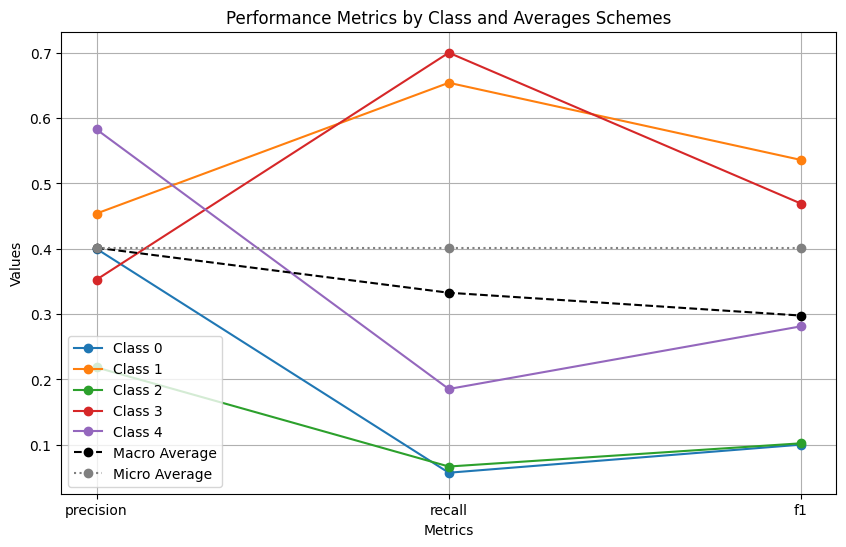

In [80]:
nb_evaluator.plot_results()

## Comparison to Scikit Learn

In [101]:
scikit_nb_pipeline = Pipeline([
    ('scikit_count_vectorizer', CountVectorizer(analyzer='word', tokenizer=lambda sentence: sentence.split('|'), lowercase=True, token_pattern=None)),
    ('scikit_naive_bayes', MultinomialNB(alpha=1.0))
])
scikit_nb_pipeline.fit(train_df['tokens'], train_df['label'])
scikit_y_hat = scikit_nb_pipeline.predict(test_df['tokens'])
scikit_nb_accuracy = accuracy_score(test_df['label'], scikit_y_hat)
print(f'Scikit Learn NB Accuracy: {scikit_nb_accuracy * 100:.2f}%')

Scikit Learn NB Accuracy: 40.14%


### Evaluation

In [102]:
scikit_nb_evaluator = eval.Evaluator(test_df['label'], scikit_y_hat)

In [103]:
scikit_nb_evaluator.compute_macro_metrics()

+---------------+-------------+----------+------------+
| Class         |   Precision |   Recall |   F1-Score |
+===============+=============+==========+============+
| Class 0       |      0.4    |   0.0573 |     0.1003 |
+---------------+-------------+----------+------------+
| Class 1       |      0.4539 |   0.654  |     0.5359 |
+---------------+-------------+----------+------------+
| Class 2       |      0.2185 |   0.0668 |     0.1024 |
+---------------+-------------+----------+------------+
| Class 3       |      0.3528 |   0.7    |     0.4691 |
+---------------+-------------+----------+------------+
| Class 4       |      0.5827 |   0.1855 |     0.2814 |
+---------------+-------------+----------+------------+
| Macro Average |      0.4016 |   0.3327 |     0.2978 |
+---------------+-------------+----------+------------+


In [104]:
scikit_nb_evaluator.compute_micro_metrics()

+-----------------+---------+
| Micro Metrics   |   Value |
+=================+=========+
| Precision       |  0.4014 |
+-----------------+---------+
| Recall          |  0.4014 |
+-----------------+---------+
| F1 Score        |  0.4014 |
+-----------------+---------+


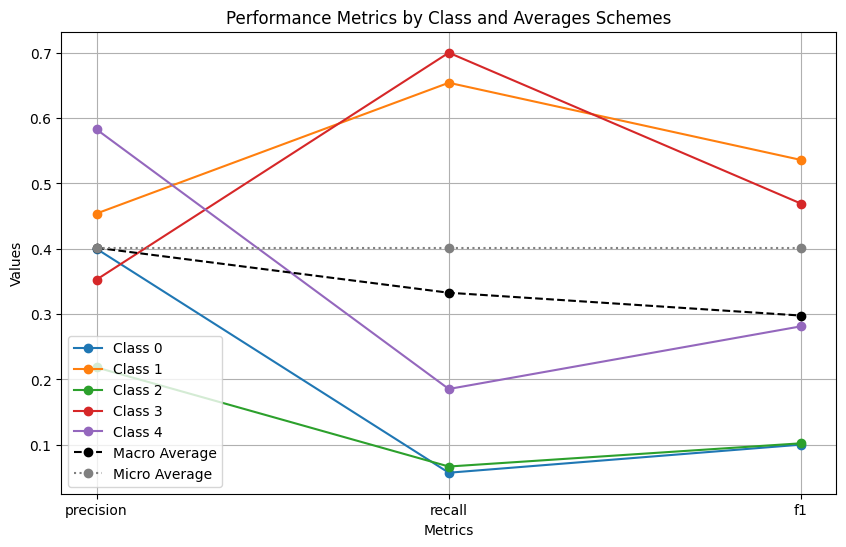

In [105]:
scikit_nb_evaluator.plot_results()

# Part 2: Logistic Regression

## Preparing data for Logistic Regression

In [5]:
X_train = train_df[['sentence', 'tokens']].to_numpy()
y_train = train_df['label'].to_numpy()

X_validation = validation_df[['sentence', 'tokens']].to_numpy()
y_validation = validation_df['label'].to_numpy()

X_test = test_df[['sentence', 'tokens']].to_numpy()
y_test = test_df['label'].to_numpy()

## Training the model and predict

In [6]:
logistic_regression = lr.LogisticRegression()
logistic_regression.fit(X_train, y_train, X_validation, y_validation, 100)

Epoch 0: Train loss = 1.6094379124338642, Validation loss = 1.6094379124340823
Epoch 10: Train loss = 1.3853601494678003, Validation loss = 1.5254182437471184
Epoch 20: Train loss = 1.2492996711263584, Validation loss = 1.5084324365962962
Epoch 30: Train loss = 1.136108415807227, Validation loss = 1.4947642082534303
Epoch 40: Train loss = 1.040875148700014, Validation loss = 1.4864792512114138
Epoch 50: Train loss = 0.9611335613428472, Validation loss = 1.483479104972568
Epoch 51: Reducing learning rate to 0.25
Epoch 60: Train loss = 0.9184879987624457, Validation loss = 1.477627585010565
Epoch 70: Train loss = 0.8845409355623508, Validation loss = 1.4762651832717635
Epoch 77: Reducing learning rate to 0.125
Epoch 80: Train loss = 0.8570278424432716, Validation loss = 1.47455592070109
Epoch 90: Train loss = 0.8418634351580052, Validation loss = 1.4751093536936906
Epoch 93: Reducing learning rate to 0.0625
Epoch 98: Reducing learning rate to 0.03125


In [8]:
logistic_regression_y_hat = logistic_regression.predict(X_test)

## Evaluation of the model

In [9]:
logistic_regression_evaluator = eval.Evaluator(y_test, logistic_regression_y_hat)

In [10]:
logistic_regression_evaluator.compute_macro_metrics()

+---------------+-------------+----------+------------+
| Class         |   Precision |   Recall |   F1-Score |
+===============+=============+==========+============+
| Class 0       |      0.2885 |   0.0538 |     0.0906 |
+---------------+-------------+----------+------------+
| Class 1       |      0.3855 |   0.545  |     0.4516 |
+---------------+-------------+----------+------------+
| Class 2       |      0.2183 |   0.1105 |     0.1468 |
+---------------+-------------+----------+------------+
| Class 3       |      0.3306 |   0.6255 |     0.4325 |
+---------------+-------------+----------+------------+
| Class 4       |      0.5149 |   0.1303 |     0.208  |
+---------------+-------------+----------+------------+
| Macro Average |      0.3475 |   0.293  |     0.2659 |
+---------------+-------------+----------+------------+


In [11]:
logistic_regression_evaluator.compute_micro_metrics()

+-----------------+---------+
| Micro Metrics   |   Value |
+=================+=========+
| Precision       |  0.3502 |
+-----------------+---------+
| Recall          |  0.3502 |
+-----------------+---------+
| F1 Score        |  0.3502 |
+-----------------+---------+


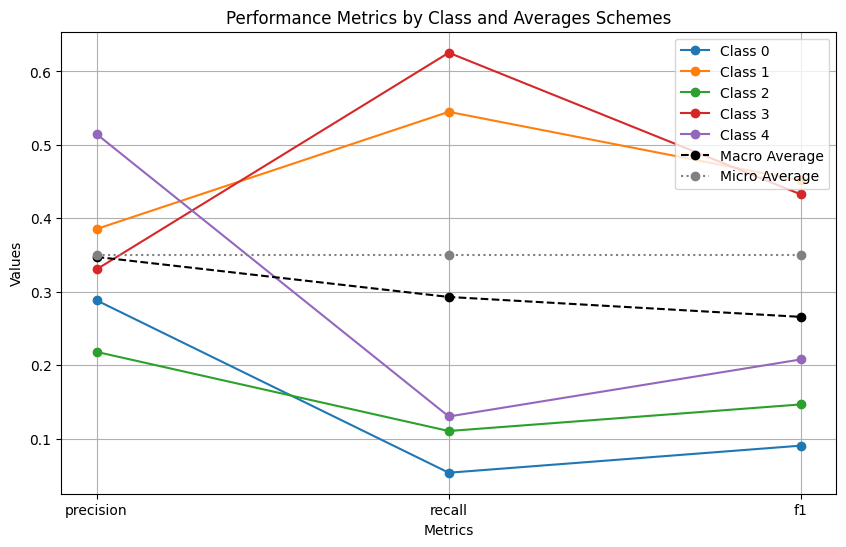

In [12]:
logistic_regression_evaluator.plot_results()